## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9948928	total: 58.2ms	remaining: 58.2s
1:	learn: 0.9749016	total: 59.3ms	remaining: 29.6s
2:	learn: 0.9551405	total: 60.4ms	remaining: 20.1s
3:	learn: 0.9386069	total: 61.6ms	remaining: 15.3s
4:	learn: 0.9205957	total: 62.7ms	remaining: 12.5s
5:	learn: 0.9038499	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8875786	total: 64.8ms	remaining: 9.19s
7:	learn: 0.8707958	total: 65.8ms	remaining: 8.16s
8:	learn: 0.8556357	total: 66.7ms	remaining: 7.35s
9:	learn: 0.8401632	total: 67.6ms	remaining: 6.69s
10:	learn: 0.8246689	total: 68.5ms	remaining: 6.16s
11:	learn: 0.8107875	total: 69.4ms	remaining: 5.71s
12:	learn: 0.7953515	total: 70.2ms	remaining: 5.33s
13:	learn: 0.7800307	total: 71ms	remaining: 5s
14:	learn: 0.7664516	total: 72ms	remaining: 4.72s
15:	learn: 0.7525317	total: 72.9ms	remaining: 4.48s
16:	learn: 0.7405187	total: 73.8ms	remaining: 4.26s
17:	learn: 0.7274134	total: 74.6ms	remaining: 4.07s
18:	learn: 0.7152792	total: 75.4ms	remaining: 3.89s

57:	learn: 0.4274351	total: 109ms	remaining: 1.77s
58:	learn: 0.4238492	total: 110ms	remaining: 1.76s
59:	learn: 0.4199424	total: 111ms	remaining: 1.74s
60:	learn: 0.4156281	total: 112ms	remaining: 1.73s
61:	learn: 0.4107318	total: 113ms	remaining: 1.71s
62:	learn: 0.4074809	total: 114ms	remaining: 1.69s
63:	learn: 0.4036489	total: 115ms	remaining: 1.68s
64:	learn: 0.3997055	total: 116ms	remaining: 1.66s
65:	learn: 0.3954686	total: 117ms	remaining: 1.65s
66:	learn: 0.3917180	total: 118ms	remaining: 1.64s
67:	learn: 0.3892650	total: 118ms	remaining: 1.62s
68:	learn: 0.3864049	total: 119ms	remaining: 1.61s
69:	learn: 0.3834572	total: 120ms	remaining: 1.6s
70:	learn: 0.3796295	total: 122ms	remaining: 1.59s
71:	learn: 0.3767702	total: 122ms	remaining: 1.58s
72:	learn: 0.3742726	total: 123ms	remaining: 1.56s
73:	learn: 0.3715977	total: 124ms	remaining: 1.55s
74:	learn: 0.3689352	total: 125ms	remaining: 1.54s
75:	learn: 0.3652980	total: 126ms	remaining: 1.53s
76:	learn: 0.3623425	total: 127m

149:	learn: 0.2570966	total: 192ms	remaining: 1.09s
150:	learn: 0.2565153	total: 193ms	remaining: 1.09s
151:	learn: 0.2556314	total: 194ms	remaining: 1.08s
152:	learn: 0.2549362	total: 195ms	remaining: 1.08s
153:	learn: 0.2539686	total: 196ms	remaining: 1.08s
154:	learn: 0.2531769	total: 197ms	remaining: 1.07s
155:	learn: 0.2523777	total: 198ms	remaining: 1.07s
156:	learn: 0.2513723	total: 199ms	remaining: 1.07s
157:	learn: 0.2510145	total: 200ms	remaining: 1.06s
158:	learn: 0.2500103	total: 200ms	remaining: 1.06s
159:	learn: 0.2493107	total: 202ms	remaining: 1.06s
160:	learn: 0.2488859	total: 203ms	remaining: 1.06s
161:	learn: 0.2483283	total: 204ms	remaining: 1.05s
162:	learn: 0.2479502	total: 205ms	remaining: 1.05s
163:	learn: 0.2473852	total: 205ms	remaining: 1.05s
164:	learn: 0.2463942	total: 206ms	remaining: 1.04s
165:	learn: 0.2460496	total: 207ms	remaining: 1.04s
166:	learn: 0.2455528	total: 208ms	remaining: 1.04s
167:	learn: 0.2447997	total: 209ms	remaining: 1.03s
168:	learn: 

265:	learn: 0.1994782	total: 300ms	remaining: 829ms
266:	learn: 0.1992052	total: 301ms	remaining: 827ms
267:	learn: 0.1989017	total: 303ms	remaining: 826ms
268:	learn: 0.1985052	total: 303ms	remaining: 825ms
269:	learn: 0.1982336	total: 304ms	remaining: 823ms
270:	learn: 0.1979156	total: 305ms	remaining: 821ms
271:	learn: 0.1975406	total: 306ms	remaining: 820ms
272:	learn: 0.1969212	total: 307ms	remaining: 818ms
273:	learn: 0.1964946	total: 308ms	remaining: 816ms
274:	learn: 0.1964478	total: 309ms	remaining: 814ms
275:	learn: 0.1958641	total: 310ms	remaining: 813ms
276:	learn: 0.1954462	total: 311ms	remaining: 811ms
277:	learn: 0.1950135	total: 312ms	remaining: 810ms
278:	learn: 0.1941503	total: 313ms	remaining: 810ms
279:	learn: 0.1936500	total: 314ms	remaining: 808ms
280:	learn: 0.1932286	total: 315ms	remaining: 807ms
281:	learn: 0.1931741	total: 316ms	remaining: 805ms
282:	learn: 0.1928466	total: 317ms	remaining: 803ms
283:	learn: 0.1922423	total: 318ms	remaining: 801ms
284:	learn: 

357:	learn: 0.1641172	total: 383ms	remaining: 687ms
358:	learn: 0.1639308	total: 384ms	remaining: 686ms
359:	learn: 0.1637282	total: 385ms	remaining: 685ms
360:	learn: 0.1632946	total: 386ms	remaining: 683ms
361:	learn: 0.1628007	total: 387ms	remaining: 682ms
362:	learn: 0.1624672	total: 388ms	remaining: 680ms
363:	learn: 0.1620547	total: 389ms	remaining: 679ms
364:	learn: 0.1617689	total: 390ms	remaining: 678ms
365:	learn: 0.1613889	total: 390ms	remaining: 676ms
366:	learn: 0.1608495	total: 391ms	remaining: 675ms
367:	learn: 0.1603629	total: 392ms	remaining: 673ms
368:	learn: 0.1600011	total: 393ms	remaining: 672ms
369:	learn: 0.1597212	total: 394ms	remaining: 671ms
370:	learn: 0.1594137	total: 395ms	remaining: 669ms
371:	learn: 0.1592277	total: 395ms	remaining: 668ms
372:	learn: 0.1587814	total: 396ms	remaining: 666ms
373:	learn: 0.1584302	total: 397ms	remaining: 665ms
374:	learn: 0.1580953	total: 398ms	remaining: 663ms
375:	learn: 0.1577463	total: 399ms	remaining: 662ms
376:	learn: 

478:	learn: 0.1286532	total: 492ms	remaining: 535ms
479:	learn: 0.1282926	total: 493ms	remaining: 534ms
480:	learn: 0.1281502	total: 494ms	remaining: 533ms
481:	learn: 0.1279705	total: 494ms	remaining: 531ms
482:	learn: 0.1278207	total: 495ms	remaining: 530ms
483:	learn: 0.1276444	total: 496ms	remaining: 529ms
484:	learn: 0.1273788	total: 497ms	remaining: 528ms
485:	learn: 0.1272912	total: 498ms	remaining: 527ms
486:	learn: 0.1271524	total: 499ms	remaining: 526ms
487:	learn: 0.1269287	total: 500ms	remaining: 525ms
488:	learn: 0.1267062	total: 501ms	remaining: 523ms
489:	learn: 0.1264643	total: 502ms	remaining: 522ms
490:	learn: 0.1262413	total: 503ms	remaining: 521ms
491:	learn: 0.1259598	total: 504ms	remaining: 520ms
492:	learn: 0.1257883	total: 504ms	remaining: 519ms
493:	learn: 0.1256006	total: 505ms	remaining: 518ms
494:	learn: 0.1253781	total: 506ms	remaining: 516ms
495:	learn: 0.1250402	total: 507ms	remaining: 515ms
496:	learn: 0.1250201	total: 508ms	remaining: 514ms
497:	learn: 

570:	learn: 0.1100215	total: 575ms	remaining: 432ms
571:	learn: 0.1100064	total: 576ms	remaining: 431ms
572:	learn: 0.1097517	total: 577ms	remaining: 430ms
573:	learn: 0.1095913	total: 577ms	remaining: 429ms
574:	learn: 0.1093678	total: 578ms	remaining: 427ms
575:	learn: 0.1092708	total: 579ms	remaining: 426ms
576:	learn: 0.1091347	total: 580ms	remaining: 425ms
577:	learn: 0.1089715	total: 581ms	remaining: 424ms
578:	learn: 0.1087540	total: 582ms	remaining: 423ms
579:	learn: 0.1085887	total: 583ms	remaining: 422ms
580:	learn: 0.1085757	total: 584ms	remaining: 421ms
581:	learn: 0.1084040	total: 584ms	remaining: 420ms
582:	learn: 0.1081679	total: 585ms	remaining: 419ms
583:	learn: 0.1080933	total: 586ms	remaining: 418ms
584:	learn: 0.1080815	total: 587ms	remaining: 416ms
585:	learn: 0.1079864	total: 588ms	remaining: 415ms
586:	learn: 0.1078685	total: 589ms	remaining: 414ms
587:	learn: 0.1076289	total: 590ms	remaining: 413ms
588:	learn: 0.1073538	total: 591ms	remaining: 412ms
589:	learn: 

688:	learn: 0.0935976	total: 683ms	remaining: 308ms
689:	learn: 0.0933927	total: 684ms	remaining: 307ms
690:	learn: 0.0932591	total: 685ms	remaining: 306ms
691:	learn: 0.0931940	total: 685ms	remaining: 305ms
692:	learn: 0.0931851	total: 686ms	remaining: 304ms
693:	learn: 0.0929988	total: 687ms	remaining: 303ms
694:	learn: 0.0929115	total: 688ms	remaining: 302ms
695:	learn: 0.0927003	total: 689ms	remaining: 301ms
696:	learn: 0.0926042	total: 690ms	remaining: 300ms
697:	learn: 0.0924905	total: 691ms	remaining: 299ms
698:	learn: 0.0922922	total: 692ms	remaining: 298ms
699:	learn: 0.0922301	total: 692ms	remaining: 297ms
700:	learn: 0.0919894	total: 693ms	remaining: 296ms
701:	learn: 0.0918868	total: 694ms	remaining: 295ms
702:	learn: 0.0916900	total: 695ms	remaining: 294ms
703:	learn: 0.0915885	total: 696ms	remaining: 293ms
704:	learn: 0.0913564	total: 697ms	remaining: 291ms
705:	learn: 0.0913056	total: 698ms	remaining: 290ms
706:	learn: 0.0912354	total: 698ms	remaining: 289ms
707:	learn: 

780:	learn: 0.0831716	total: 766ms	remaining: 215ms
781:	learn: 0.0830457	total: 767ms	remaining: 214ms
782:	learn: 0.0828764	total: 768ms	remaining: 213ms
783:	learn: 0.0826774	total: 769ms	remaining: 212ms
784:	learn: 0.0826194	total: 770ms	remaining: 211ms
785:	learn: 0.0825393	total: 771ms	remaining: 210ms
786:	learn: 0.0824194	total: 771ms	remaining: 209ms
787:	learn: 0.0822808	total: 772ms	remaining: 208ms
788:	learn: 0.0820261	total: 773ms	remaining: 207ms
789:	learn: 0.0820186	total: 774ms	remaining: 206ms
790:	learn: 0.0818593	total: 775ms	remaining: 205ms
791:	learn: 0.0817403	total: 776ms	remaining: 204ms
792:	learn: 0.0816546	total: 777ms	remaining: 203ms
793:	learn: 0.0814995	total: 778ms	remaining: 202ms
794:	learn: 0.0813356	total: 779ms	remaining: 201ms
795:	learn: 0.0811560	total: 780ms	remaining: 200ms
796:	learn: 0.0809666	total: 781ms	remaining: 199ms
797:	learn: 0.0808728	total: 781ms	remaining: 198ms
798:	learn: 0.0808434	total: 782ms	remaining: 197ms
799:	learn: 

901:	learn: 0.0692895	total: 874ms	remaining: 95ms
902:	learn: 0.0692035	total: 875ms	remaining: 94ms
903:	learn: 0.0691018	total: 876ms	remaining: 93ms
904:	learn: 0.0689901	total: 877ms	remaining: 92.1ms
905:	learn: 0.0688367	total: 878ms	remaining: 91.1ms
906:	learn: 0.0687147	total: 879ms	remaining: 90.1ms
907:	learn: 0.0686276	total: 880ms	remaining: 89.2ms
908:	learn: 0.0685146	total: 881ms	remaining: 88.2ms
909:	learn: 0.0684392	total: 882ms	remaining: 87.2ms
910:	learn: 0.0683645	total: 883ms	remaining: 86.2ms
911:	learn: 0.0682876	total: 884ms	remaining: 85.3ms
912:	learn: 0.0681733	total: 885ms	remaining: 84.3ms
913:	learn: 0.0680743	total: 886ms	remaining: 83.4ms
914:	learn: 0.0680235	total: 887ms	remaining: 82.4ms
915:	learn: 0.0678676	total: 888ms	remaining: 81.4ms
916:	learn: 0.0677671	total: 889ms	remaining: 80.4ms
917:	learn: 0.0676310	total: 890ms	remaining: 79.5ms
918:	learn: 0.0675353	total: 890ms	remaining: 78.5ms
919:	learn: 0.0674276	total: 891ms	remaining: 77.5ms

992:	learn: 0.0609087	total: 957ms	remaining: 6.75ms
993:	learn: 0.0608113	total: 958ms	remaining: 5.78ms
994:	learn: 0.0607102	total: 959ms	remaining: 4.82ms
995:	learn: 0.0606323	total: 960ms	remaining: 3.85ms
996:	learn: 0.0605824	total: 961ms	remaining: 2.89ms
997:	learn: 0.0604470	total: 962ms	remaining: 1.93ms
998:	learn: 0.0604032	total: 962ms	remaining: 963us
999:	learn: 0.0603073	total: 963ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

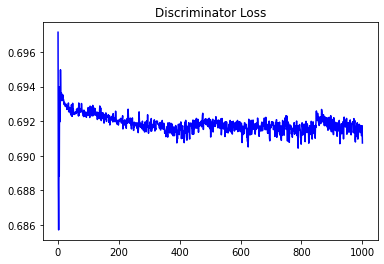

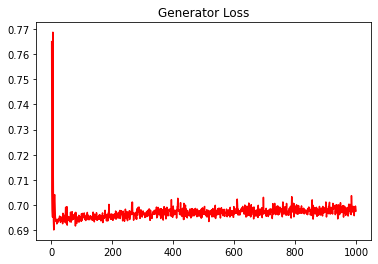

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1539828905181647


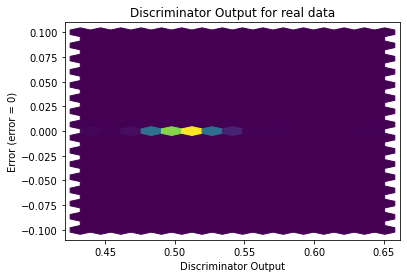

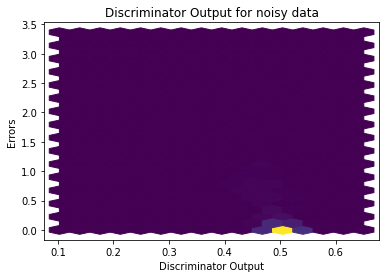

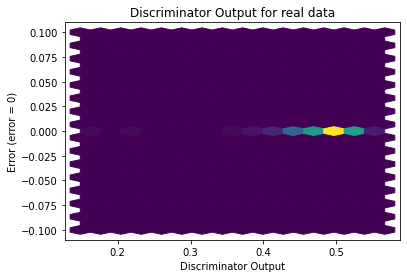

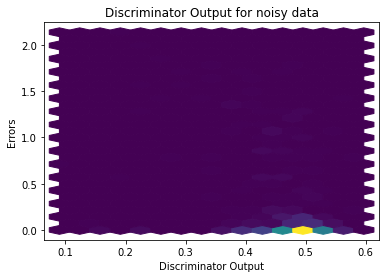

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


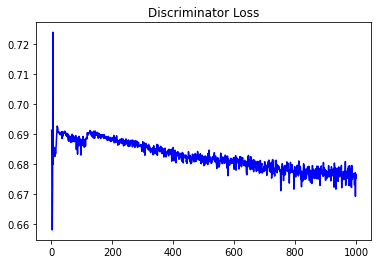

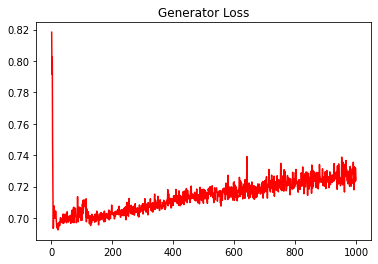

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17797858967101246


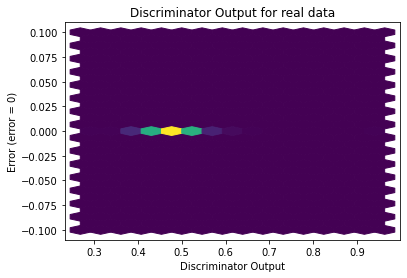

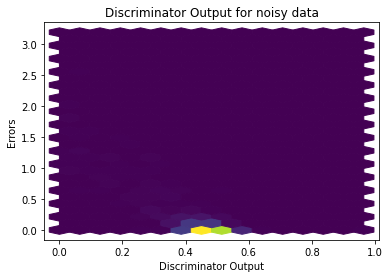

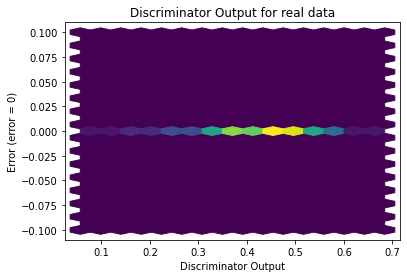

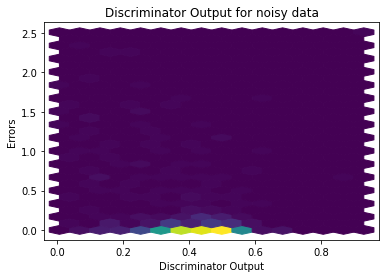

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2904]], requires_grad=True)
